## Modules

In [2]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import random
import math

## Logic

In [3]:
def is_inside_circle(C, R, x, y):
    if((x-C[0])**2+(y-C[1])**2<(R**2)):
        return True
    else:
        return False

def is_inside_ring(C,r,R,x,y):
    if((r**2)<=(x-C[0])**2+(y-C[1])**2<=(R**2)):
        return True
    else:
        return False
    
def is_inside_wedge(wedge,x,y):
    if is_inside_ring(wedge[0],wedge[1]-wedge[4],wedge[1],x,y):
        angle=math.degrees(math.atan2(y,x))%360
        if wedge[2]<=angle<=wedge[3]:
            return True
        else:
            return False
    else:
        return False
    
def is_inside_square(x, y):
    if(-2 < x < 10 and -2 < y < 2):
        return True
    else:
        return False

## Obstacles, goal

In [4]:
wedges=[[(0,0),1,20,340,0.2]]

circles=[[(-0.2,0.3),0.06],[(-0.3,-0,2),0.03]]

goal=[(-1.5, 1.5),0.1]

## Inputs

In [5]:
d=0.01
angle=45
poss_angles=(-5,5)

In [6]:
A = random.uniform(-5,5)

In [7]:
A

-0.6253382580734907

## Functions

In [8]:
def one_walk(steps,initial_pos,
             d=d,poss_angles=poss_angles):
    angle=random.randint(0,360)
    x=[initial_pos[0]]
    y=[initial_pos[1]]
    control=True
    goal_reached=False
    counter=0
    while (counter<steps and control): # you can use control==True
        angle += random.choice(poss_angles)
        x.append(x[-1]+d*math.cos(math.radians(angle)))
        y.append(y[-1]+d*math.sin(math.radians(angle)))
        '''
        for wedge in wedges:
            if is_inside_wedge(wedge,x[-1],y[-1]):
                x.pop()
                y.pop()
                control=False
                break
        '''
        '''
        for circle in circles:
            if is_inside_circle(circle[0], circle[1], x[-1], y[-1]):
                x.pop()
                y.pop()
                control=False
                break
        '''
        if not (is_inside_square(x[-1], y[-1])):
            x.pop()
            y.pop()
            control=False
        
        #if the goal is reached
        '''
        if is_inside_circle(goal[0],goal[1],x[-1], y[-1]):
            control=False
            goal_reached=True
        '''    
        #counter
        counter+=1
        
    return(x,y,goal_reached)

In [9]:
def decision(walks,steps,initial_pos):
    goal_reached=False
    counter=0
    xf=[]
    yf=[]
    while(counter<walks and not goal_reached):
        x,y,goal_reached=one_walk(steps=steps,initial_pos=initial_pos)
        if goal_reached:
            xf=x
            yf=y
            counter=walks
        else:
            if len(x)>len(xf):
                xf=x
                yf=y
        counter+=1
    return(xf[:10],yf[:10],goal_reached)

In [29]:
steps=1000
walks=10
goal_reached=False
counter=0
X=[0]
Y=[0]
while (counter<200 and not goal_reached):
    x,y,goal_reached=decision(walks=walks,steps=steps,initial_pos=(X[-1],Y[-1]))
    X.pop()
    Y.pop()
    X+=x
    Y+=y
    counter+=1

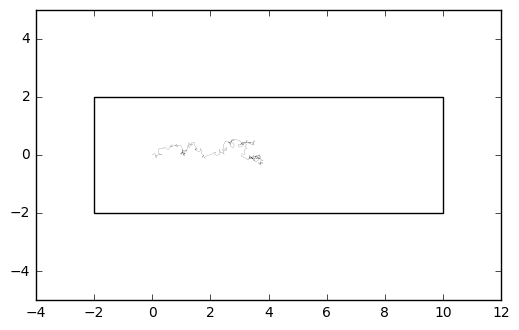

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
ax.plot(X,Y,linewidth=0.1,color='k')
'''
for circle in circles:
    ax.add_patch(patches.Circle(circle[0],circle[1],color='k',fill=True))
'''
'''    
for wedge in wedges:
    ax.add_patch(patches.Wedge(wedge[0],wedge[1],20,340,width=wedge[4]))
'''
ax.add_patch(patches.Rectangle((-2, -2),12.0,4.0,fill=False))
'''
ax.add_patch(patches.Circle(goal[0],goal[1],color='g',fill=True))
'''
plt.axis([-4, 12, -5, 5])
plt.show()

In [26]:
counter

200

In [12]:
X

[0,
 0.009702957262759965,
 0.019158143018753133,
 0.028293597595179146,
 0.037748783351172314,
 0.04745174061393228,
 0.05690692636992545,
 0.06660988363268541,
 0.07648676703863679,
 0.08646240754123502,
 0.09633929094718639,
 0.10631493144978463,
 0.11631340840134854,
 0.1262890489039468,
 0.13616593230989818,
 0.14586888957265814,
 0.1553240753286513,
 0.16502703259141127,
 0.17490391599736266,
 0.1848795564999609,
 0.1947564399059123,
 0.20445939716867226,
 0.21391458292466542,
 0.22305003750109142,
 0.2325052232570846,
 0.2416406778335106,
 0.25109586358950375,
 0.2607988208522637,
 0.2702540066082569,
 0.2793894611846829,
 0.28813565825607684,
 0.29727111283250285,
 0.30672629858849604,
 0.31586175316492204,
 0.324607950236316,
 0.333743404812742,
 0.3431985905687352,
 0.3523340451451612,
 0.3617892309011544,
 0.3709246854775804,
 0.3803798712335736,
 0.3895153258099996,
 0.39826152288139355,
 0.40739697745781955,
 0.41685216321381274,
 0.42655512047657274,
 0.4364320038825241,


In [46]:
fig.savefig("chaosinbox1.png",dpi=900)